# Modélisation du Problème de transport 

In [6]:
import numpy as np 
import numpy.linalg as npl
import numpy.random as npr
import matplotlib.pyplot as plt
import math as ma

In [8]:
p1 = 0.4
p2 = 0.7

m = max(-p1*p2,-(1-p1)*(1-p2), (1-p1)*p2-1, (1-p2)*p1-1 )
M = min(1-p1*p2,1-(1-p1)*(1-p2), (1-p1)*p2, (1-p2)*p1 )

m,M

(-0.18000000000000002, 0.12000000000000002)

In [4]:
def c1(x,y):
    return npl.norm(x-y,1)

def c2(x,y):
    return npl.norm(x-y,2)

def cp(x,y):
    return npl.norm(x-y,1)**p

def Ic(l,c):
    a = c(x1,y1)*(p2*p1 +l) + c(x2,y1)*((p2*(1-p1) -l))
    b= c(x1,y2)*((p1*(1-p2)-l))+ c(x2,y2)*((1-p1)*(1-p2)+l)
    return a+b


def Ic_p(l):
    return c(x1,y1)- c(x2,y1)- c(x1,y2) + c(x2,y2)



## Exemple1

In [9]:
x1 = np.array([8,8])
x2 = np.array([1,2])
y1 = np.array([5,7])
y2 = np.array([10,0])

k = c2(x1,y1)- c2(x2,y1)- c2(x1,y2) + c2(x2,y2)

if k>=0: 
    l0 = m
else:
    l0= M
    
print(f"k={k}",f"l0={l0}")

print(f"le coût optimal de ce transport est de : {Ic(l0,c2)}")

k=-2.2675133712069027 l0=0.12000000000000002
le coût optimal de ce transport est de : 5.9517116724850725


Text(0, 0.5, 'coût')

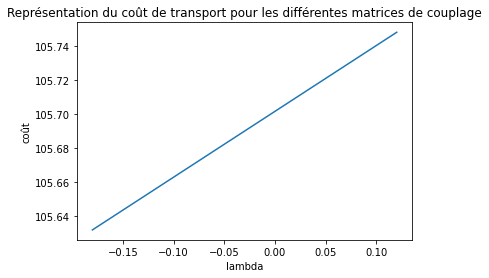

In [19]:
L = np.linspace(m,M,1000)
Y = Ic(L,c2)
plt.plot(L,Y)
plt.title("Représentation du coût de transport pour les différentes matrices de couplage")
plt.xlabel('lambda')
plt.ylabel('coût')

In [6]:
pistar = np.array([[p2*p1 +l0 ,p2*(1-p1) -l0],
                   [p1*(1-p2)-l0,(1-p1)*(1-p2)+l0]])
pistar

array([[0.4, 0.3],
       [0. , 0.3]])

## Exemple 2

In [13]:
x1 = np.array([0,1])
x2 = np.array([1,1])
y1 = np.array([4,-7])
y2 = np.array([5,333])

k = c2(x1,y1)- c2(x2,y1)- c2(x1,y2) + c2(x2,y2)

if k>=0: 
    l0 = m
else:
    l0= M
    
print(f"k={k}",f"l0={l0}")

print(f"le coût optimal de ce transport est de : {Ic(l0,c2)}")

k=0.3867152080754295 l0=-0.18000000000000002
le coût optimal de ce transport est de : 105.63212397851855


Text(0, 0.5, 'coût')

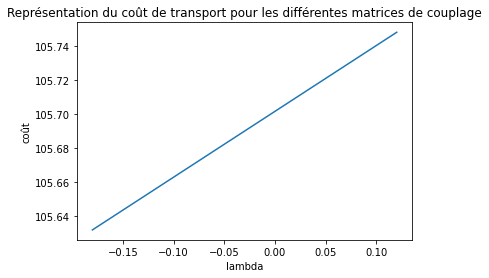

In [20]:
L = np.linspace(m,M,1000)
Y = Ic(L,c2)
plt.plot(L,Y)
plt.title("Représentation du coût de transport pour les différentes matrices de couplage")
plt.xlabel('lambda')
plt.ylabel('coût')


In [9]:
pistar = np.array([[p2*p1 +l0 ,p2*(1-p1) -l0],[p1*(1-p2)-l0,(1-p1)*(1-p2)+l0]])
pistar

array([[0.4, 0.3],
       [0. , 0.3]])

# Installation d'un nouvel espace de stockage dans le plan

Deux sites de productions sont fixés dans le pavé $[-r,r]^2$
avec des capacités de production différentes respectivement $p1$ et $1-p1$. Un espace de stockage avec une certaine capacité $p2$ est placé lui aussi dans le plan. Nous souhaitons investir dans un nouvel espace de stockage et en fonction de son emplacement, avec sa capacité de stackage de $1-p2$, nous cherchons à connaître la manière la plus optimale de répartir les marchandises entre les deux entrepôts. 

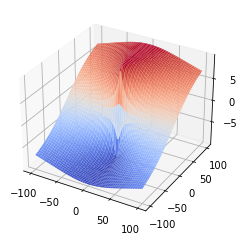

In [21]:

import numpy as np 
import numpy.linalg as npl
import numpy.random as npr
import math as ma
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def c(x,y):
    return npl.norm(x-y,2)

x1 = np.array([0,5])
x2 = np.array([0,-5])
y1 = np.array([0,0])
#y2 est le nouveau magasin 

r = 100 
p = 2

x = y = np.linspace(-r,r,100)


# Création de la grille de coordonnées en carré
X, Y = np.meshgrid(x, y) #X = y2[0] et Y = y2[1]


Z= (abs(x1[0]-y1[0])**p+abs(x1[1]-y1[1])**p)**(1/p)- (abs(x2[0]-y1[0])**p+abs(x2[1]-y1[1])**p)**(1/p)- (abs(x1[0]-X)**p+abs(x1[1]-Y)**p)**(1/p) + (abs(x2[0]-X)**p+abs(x2[1]-Y)**p)**(1/p)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Créer la surface de la fonction
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=1)

# Afficher le graphique
plt.show()



Si le nouvel entrepot se situe dans une zone rouge (k positif) on prend $\lambda_0= m$ 
et inversement si le nouveau magasin se situe dans une zone bleu (k négatif) on prend $\lambda_0=M$ 

On a donc la matrice de couplage optimale $\pi^*$ suivante 


$$\pi^* = \begin{pmatrix}
p_2p_1 +\lambda_0&p_2(1-p_1) -\lambda_0\\
p_1(1-p_2)-\lambda_0&(1-p_1)(1-p_2)+\lambda_0
\end{pmatrix}$$





In [23]:
import plotly.graph_objs as go


x1 = np.array([5,-6])
x2 = np.array([-3.5,-5])
y1 = np.array([7,-1])
#y2 est le nouveau magasin 

r = 100 
p = 2

x = y = np.linspace(-r,r,100)

# Création de la grille de coordonnées en carré
X, Y = np.meshgrid(x, y)

Z= (abs(x1[0]-y1[0])**p+abs(x1[1]-y1[1])**p)**(1/p)- (abs(x2[0]-y1[0])**p+abs(x2[1]-y1[1])**p)**(1/p)- (abs(x1[0]-X)**p+abs(x1[1]-Y)**p)**(1/p) + (abs(x2[0]-X)**p+abs(x2[1]-Y)**p)**(1/p)

# Créer la surface de la fonction
surf = go.Surface(x=X, y=Y, z=Z)

# Définir la mise en page du graphique
layout = go.Layout(title='Graphique 3D interactif')

# Créer la figure
fig = go.Figure(data=[surf], layout=layout)

# Afficher le graphique interactif
fig.show()